In [24]:
import numpy as np
from collections import Counter


class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [33]:
knn = KNN(k=3)  # Specify the value of K (number of neighbors)


In [34]:
from sklearn.datasets import load_iris

data = load_iris()

X = data.data
y = data.target

In [35]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [36]:
knn.fit(X_train,y_train)

In [37]:
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

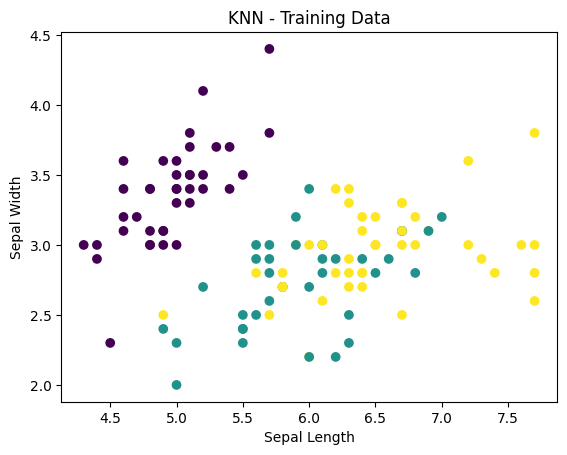

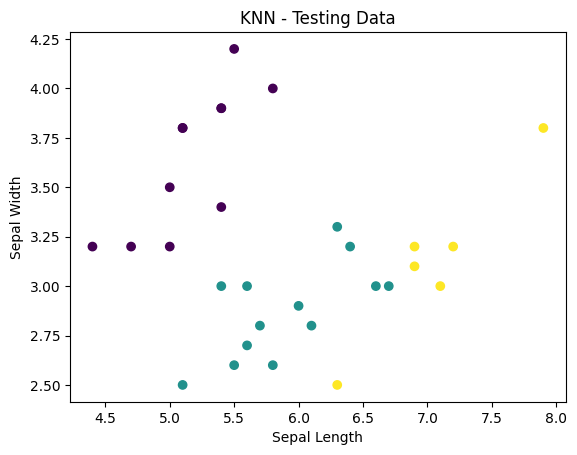

In [38]:
# Plotting scatter plot for the training data
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN - Training Data')
plt.show()

# Plotting scatter plot for the testing data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN - Testing Data')
plt.show()

In [39]:
from sklearn.metrics import accuracy_score
training_score = accuracy_score(y_train,y_pred_train)
testting_score = accuracy_score(y_test,y_pred_test)

In [40]:
print("Training score: ",training_score)
print("Testing score: ",testting_score)

Training score:  0.95
Testing score:  1.0
